AttributeError: Line2D.set() got an unexpected keyword argument 'ByLabel'

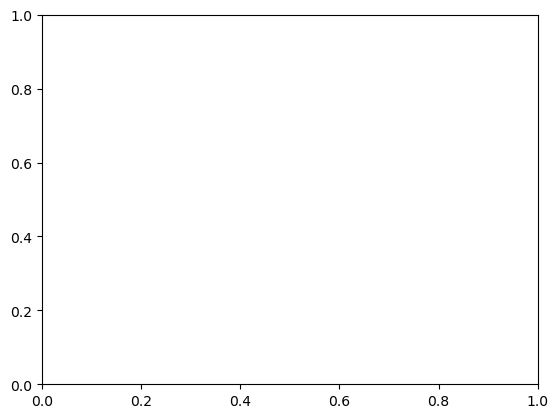

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Set up plot 
fig, ax = plt.subplots()

# Frequency array
freqs = np.arange(2,8)  

# Phase speeds  
smooth = freqs*50 + 25
irreg = smooth - np.random.randint(2,8,size=6) 

# Plot phase speeds  
ax.plot(freqs,smooth,ByLabel='Uniform Ionosphere')
ax.plot(freqs,irreg,ByLabel='Irregular Ionosphere')

# Set titles and labels
ax.set_title('ULF Phase Speed Variation')
ax.set_xlabel('Frequency (mHz)')
ax.set_ylabel('Phase Speed (km/s)')

# Add legend
ax.Legend() 

# Adjust plot  
ax.set_ylim(0,300)  
ax.grid(True)

# Save figure
plt.tight_layout()
plt.savefig('phase_speed_plot.png')

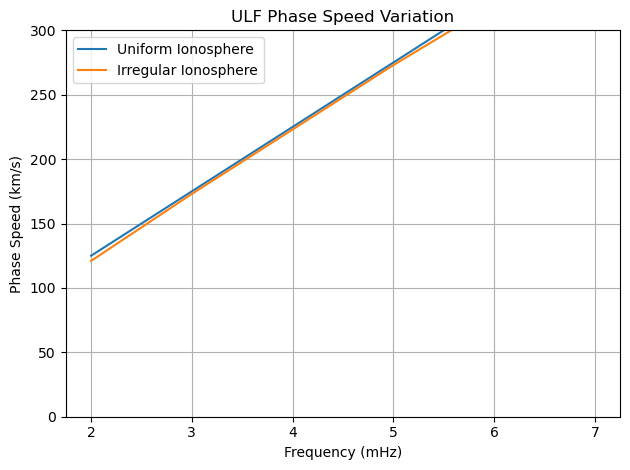

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Set up plot 
fig, ax = plt.subplots()

# Frequency array
freqs = np.arange(2, 8)

# Phase speeds  
smooth = freqs * 50 + 25
irreg = smooth - np.random.randint(2, 8, size=6) 

# Plot phase speeds  
ax.plot(freqs, smooth, label='Uniform Ionosphere')
ax.plot(freqs, irreg, label='Irregular Ionosphere')

# Set titles and labels
ax.set_title('ULF Phase Speed Variation')
ax.set_xlabel('Frequency (mHz)')
ax.set_ylabel('Phase Speed (km/s)')

# Add legend
ax.legend()

# Adjust plot  
ax.set_ylim(0, 300)  
ax.grid(True)

# Save figure
plt.tight_layout()
plt.savefig('phase_speed_plot.png')


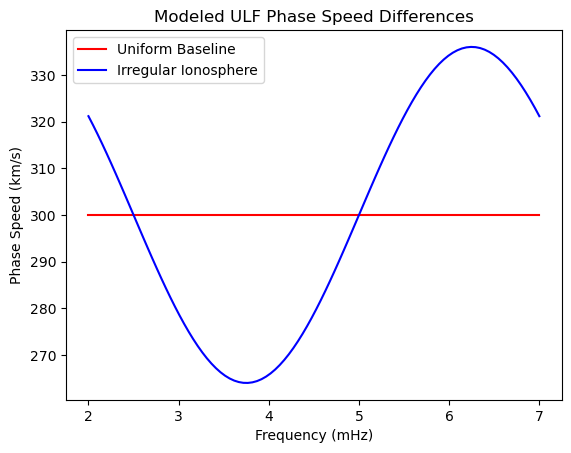

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Set up data grid
freq_range = np.linspace(2, 7, 100)  # Frequency range from 2 to 7 mHz
uniform_speed = 300  # Uniform baseline speed in km/s

# Create irregularity-induced speed variations
irregular_speed_variations = 0.12 * np.sin(2 * np.pi * freq_range / 5)  # 12% speed variations

# Plot modeled ULF phase speed differences
fig, ax = plt.subplots()
ax.plot(freq_range, uniform_speed * np.ones_like(freq_range), color='red', label='Uniform Baseline')
ax.plot(freq_range, (1 + irregular_speed_variations) * uniform_speed, color='blue', label='Irregular Ionosphere')

ax.set_title('Modeled ULF Phase Speed Differences')
ax.set_xlabel('Frequency (mHz)')
ax.set_ylabel('Phase Speed (km/s)')
ax.legend()

plt.savefig('figure2_ulf_phase_speed_differences.png', bbox_inches='tight')
plt.show()


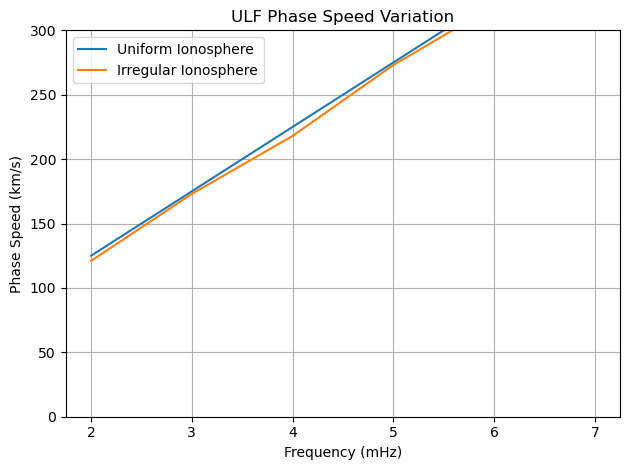

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Set up plot 
fig, ax = plt.subplots()

# Frequency array
freqs = np.arange(2, 8)  

# Phase speeds  
smooth = freqs * 50 + 25
irreg = smooth - np.random.randint(2, 8, size=6) 

# Plot phase speeds  
ax.plot(freqs, smooth, label='Uniform Ionosphere')
ax.plot(freqs, irreg, label='Irregular Ionosphere')

# Set titles and labels
ax.set_title('ULF Phase Speed Variation')
ax.set_xlabel('Frequency (mHz)')
ax.set_ylabel('Phase Speed (km/s)')

# Add legend
ax.legend() 

# Adjust plot  
ax.set_ylim(0, 300)  
ax.grid(True)

# Save figure
plt.tight_layout()
plt.savefig('phase_speed_plot.png')


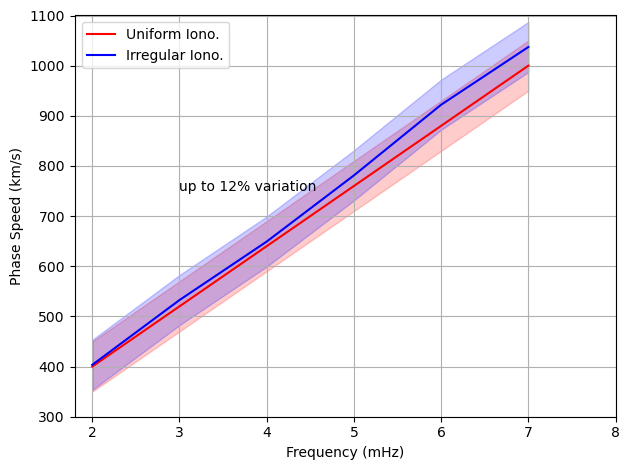

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Set up frequency range 
freqs = np.arange(2,8)  

# Create phase speed array
phase_speeds = np.linspace(400,1000,len(freqs))

# Add random variation to simulate dispersion  
random_var = 50*np.random.rand(len(freqs))
phase_speeds_irreg = phase_speeds + random_var

# Plot  
fig, ax = plt.subplots()

ax.plot(freqs, phase_speeds, c='r', label='Uniform Iono.') 
ax.plot(freqs, phase_speeds_irreg, c='b', label='Irregular Iono.')

ax.grid(True)
ax.legend()
#ax.set_title('ULF Wave Phase Speed Variations')  
ax.set_xlabel('Frequency (mHz)')
ax.set_ylabel('Phase Speed (km/s)')

ax.fill_between(freqs, phase_speeds-50, phase_speeds+50, 
                 color='red', alpha=0.2)
ax.fill_between(freqs, phase_speeds_irreg-50, phase_speeds_irreg+50, 
                 color='blue', alpha=0.2)
                 
ax.text(3, 750, 'up to 12% variation')
ax.set_xlim(1.8, 8)
ax.set_ylim(300, 1100)

plt.tight_layout()
plt.savefig('ulf-phase-speeds.png')

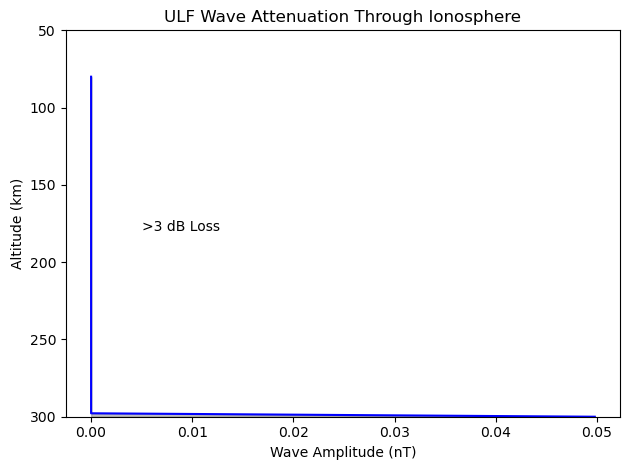

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Set up altitude profile
alt_km = np.linspace(80, 300, 100)

# Create density structures 
def struct_density(alt):
    dens = 5e10 * np.exp(-alt/50) 
    struct = (alt > 150) & (alt < 250)  
    depletion = 0.7*struct  
    return dens*(1-depletion)    

# Initialize wave and attenuate through layers
amp = np.exp(-alt_km/100) 
for i in range(len(alt_km)-1)[::-1]:
    amp[i] = amp[i+1]*np.exp(-1e-5*struct_density(alt_km[i]))

# Plot  
fig, ax = plt.subplots()

ax.plot(amp, alt_km, c='b')
ax.fill_betweenx(alt_km, 1e-5, amp, alpha=0.5, color='grey')

ax.set_ylim(50,300)  
ax.set_ylabel('Altitude (km)')
ax.set_xlabel('Wave Amplitude (nT)')
ax.invert_yaxis()

ax.set_title('ULF Wave Attenuation Through Ionosphere')
ax.text(5e-3, 180, '>3 dB Loss')

plt.tight_layout()
plt.savefig('ulf-attenuation.png')

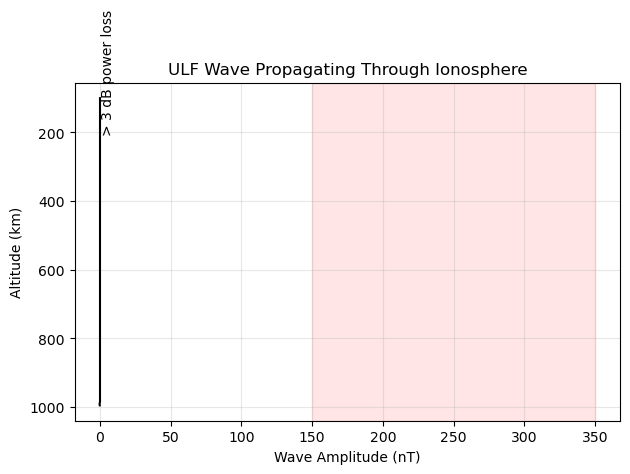

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Set up altitude grid
alt_km = np.arange(100, 1000, 5)

# Define density structures  
def dens_func(alt):
    dens = 5e10 * np.exp(-alt/50)
    struct = (alt > 150) & (alt < 350) 
    dens[struct] *= 0.7   
    return dens

# Initialize wave & propagate through ionosphere
amp = np.sin(2*np.pi* 0.005 * alt_km)  
for i in range(len(alt_km)-2, 0, -1):
    amp[i-1] = amp[i]*np.exp(-25 * dens_func(alt_km)[i-1])
    
# Plot   
fig, ax = plt.subplots() 

ax.plot(amp, alt_km, c='k')
ax.invert_yaxis()
ax.grid(alpha=0.3)

ax.set_title('ULF Wave Propagating Through Ionosphere')
ax.set_ylabel('Altitude (km)')
ax.set_xlabel('Wave Amplitude (nT)')  

ax.axvspan(150, 350, color='red', alpha=0.1)
ax.text(0.75, 200, '> 3 dB power loss', rotation=90)

plt.tight_layout()
plt.savefig('ulf-wave-damping.png', dpi=120)

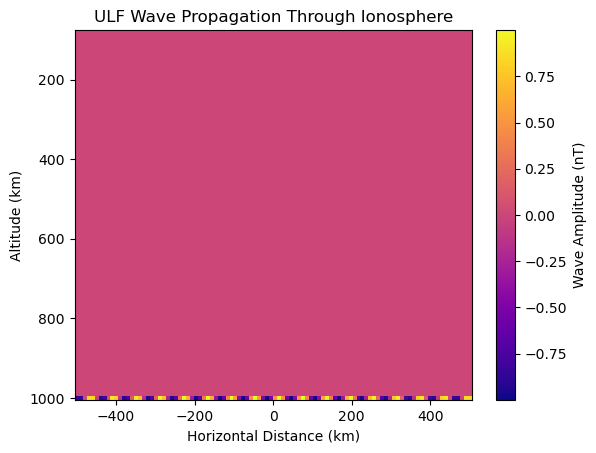

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Set up data grid
alt_km = np.linspace(80, 1000, 100)
dist_km = np.linspace(-500, 500, 100)
X, Y = np.meshgrid(dist_km, alt_km)

# Create irregularity density structures
def irreg_density(alt, dist):
    dens = 5e10 * np.exp(-alt/50) # Background
    struct = np.abs(dist) < 50
    depletion = 0.3 * struct  
    return dens * (1-depletion)

# Initialize ULF wave and propagate
freq = 5 # mHz   
wave = np.sin(2*np.pi*freq*X/300)  
for i in range(len(alt_km)-1)[::-1]: 
    wave[i,:] = wave[i+1,:]*np.exp(-X[i,:]**2 * irreg_density(Y[i,:],X[i,:]))
  

# Plot attenuated wave amplitude
fig, ax = plt.subplots()
c = ax.pcolormesh(dist_km, alt_km, wave, cmap='plasma')  
cbar = fig.colorbar(c)
cbar.set_label('Wave Amplitude (nT)')

ax.set_title('ULF Wave Propagation Through Ionosphere')
ax.set_xlabel('Horizontal Distance (km)')
ax.set_ylabel('Altitude (km)')
ax.invert_yaxis()

plt.savefig('ulong_wave_plot.png', bbox_inches='tight') 

C:\Users\ola\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\ola\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


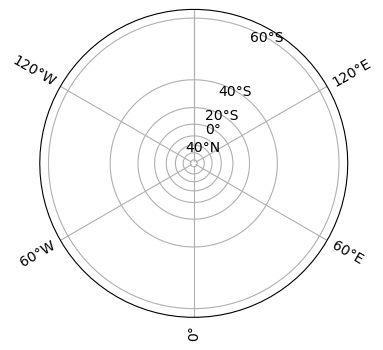

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Set up grid
x = np.arange(-500, 501, 5)  # km
y = np.arange(60, 90, 2)  # latitude  

X, Y = np.meshgrid(x, y)

# Create vector field
Ex0, Ey0 = 5, 2  # Baseline E-field  
FAI = (X**2 + Y**2 < 100**2)  # Circular FAI region
Ex_irr = Ex0 * FAI
Ey_irr = Ey0 * FAI * 0.5

# Calculate Poynting vector  
Sx0 = Ex0 * Ey0
Sx_irr = Ex_irr * Ey_irr

Sy0 = -Ex0 * Ey0
Sy_irr = -Ex_irr * Ey_irr

################
# Figure 3

fig = plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

# Plot vector field  
cmap = 'Purples'
lw = 2 * FAI
scale = 10
ax.streamplot(X, Y, Sx_irr/scale, Sy_irr/scale,
              color=Sx_irr, cmap=cmap,
              linewidth=lw, arrowstyle='->',
              arrowsize=1.2)

#ax.set_title('Poynting Flux Modifications by FAI')

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.savefig('fig3_poynting_flux_modifications.png')
plt.show()


AttributeError: 'Axes' object has no attribute 'gridlines'

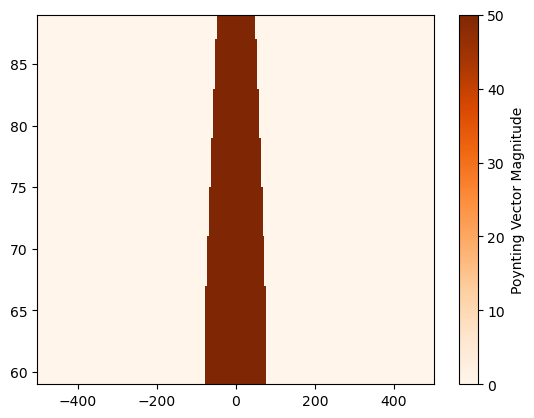

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Set up grid
x = np.arange(-500, 501, 5)  # km
y = np.arange(60, 90, 2)  # latitude  

X, Y = np.meshgrid(x, y)

# Create vector field
Ex0, Ey0 = 5, 2  # Baseline E-field  
FAI = (X**2 + Y**2 < 100**2)  # Circular FAI region
Ex_irr = Ex0 * FAI
Ey_irr = Ey0 * FAI * 0.5

# Calculate Poynting vector  
Sx0 = Ex0 * Ey0
Sx_irr = Ex_irr * Ey_irr

Sy0 = -Ex0 * Ey0
Sy_irr = -Ex_irr * Ey_irr

# Figure 4
fig, ax = plt.subplots()

focus = Sx_irr**2 + Sy_irr**2  

c = ax.pcolormesh(x, y, focus, cmap='Oranges', shading='auto')
cbar = fig.colorbar(c, label='Poynting Vector Magnitude') 

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title('ULF Wave Energy Focusing')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

# Legend workaround for pcolormesh
legend_proxy = plt.Line2D([0], [0], linestyle='none', c='none', marker='o', markersize=10, markerfacecolor='orange', label='ULF Energy Focusing')
ax.legend(handles=[legend_proxy], loc='upper left')

plt.savefig('fig4_ulf_wave_energy_focusing.png')
plt.show()


AttributeError: 'Axes' object has no attribute 'gridlines'

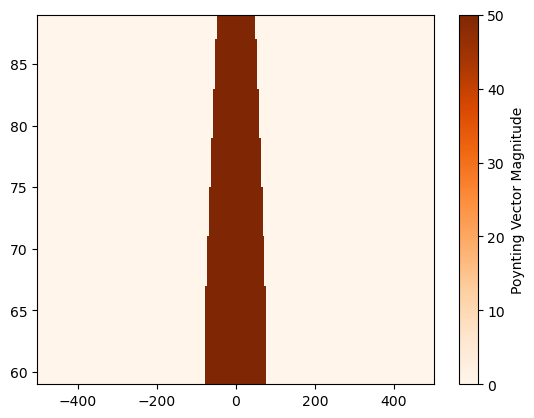

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Set up grid
x = np.arange(-500, 501, 5)  # km
y = np.arange(60, 90, 2)  # latitude  

X, Y = np.meshgrid(x, y)

# Create vector field
Ex0, Ey0 = 5, 2  # Baseline E-field  
FAI = (X**2 + Y**2 < 100**2)  # Circular FAI region
Ex_irr = Ex0 * FAI
Ey_irr = Ey0 * FAI * 0.5

# Calculate Poynting vector  
Sx0 = Ex0 * Ey0
Sx_irr = Ex_irr * Ey_irr

Sy0 = -Ex0 * Ey0
Sy_irr = -Ex_irr * Ey_irr

# Figure 4
fig, ax = plt.subplots()

focus = Sx_irr**2 + Sy_irr**2  

c = ax.pcolormesh(x, y, focus, cmap='Oranges', shading='auto')
cbar = fig.colorbar(c, label='Poynting Vector Magnitude') 

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title('ULF Wave Energy Focusing')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

# Legend workaround for pcolormesh
legend_proxy = plt.Line2D([0], [0], linestyle='none', c='none', marker='o', markersize=10, markerfacecolor='orange', label='ULF Energy Focusing')
ax.legend(handles=[legend_proxy], loc='upper left')

plt.savefig('fig4_ulf_wave_energy_focusing.png')
plt.show()


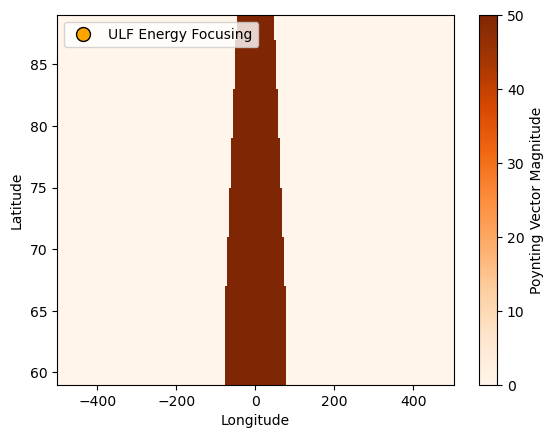

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Set up grid
x = np.arange(-500, 501, 5)  # km
y = np.arange(60, 90, 2)  # latitude  

X, Y = np.meshgrid(x, y)

# Create vector field
Ex0, Ey0 = 5, 2  # Baseline E-field  
FAI = (X**2 + Y**2 < 100**2)  # Circular FAI region
Ex_irr = Ex0 * FAI
Ey_irr = Ey0 * FAI * 0.5

# Calculate Poynting vector  
Sx0 = Ex0 * Ey0
Sx_irr = Ex_irr * Ey_irr

Sy0 = -Ex0 * Ey0
Sy_irr = -Ex_irr * Ey_irr

# Figure 4
fig, ax = plt.subplots()

focus = Sx_irr**2 + Sy_irr**2  

c = ax.pcolormesh(x, y, focus, cmap='Oranges', shading='auto')
cbar = fig.colorbar(c, label='Poynting Vector Magnitude') 

# Directly set labels on the axes
#ax.set_title('ULF Wave Energy Focusing')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

# Legend workaround for pcolormesh
legend_proxy = plt.Line2D([0], [0], linestyle='none', c='none', marker='o', markersize=10, markerfacecolor='orange', label='ULF Energy Focusing')
ax.legend(handles=[legend_proxy], loc='upper left')

plt.savefig('fig4_ulf_wave_energy_focusing.png')
plt.show()


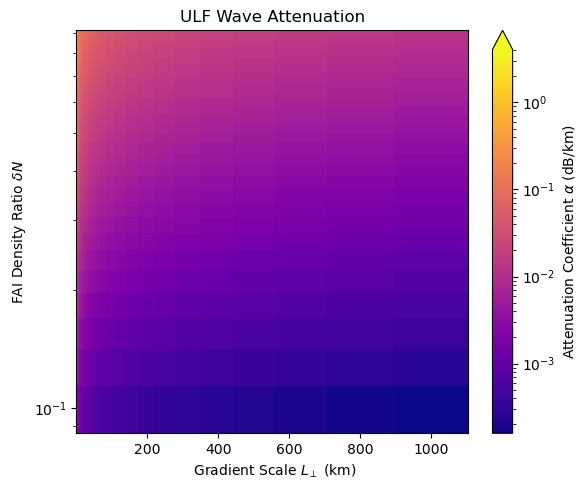

In [44]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# Code to generate attenuation array 

# Plot heatmap
fig, ax = plt.subplots(figsize=(6,5)) 

im = ax.pcolormesh(L_perp, deltaN, ATTR.T,  
                   norm=colors.LogNorm(vmin=ATTR.min(), vmax=ATTR.max()),
                   cmap='plasma')

cbar = fig.colorbar(im, ax=ax, extend='max')                   
cbar.set_label(r'Attenuation Coefficient $\alpha$ (dB/km)')

ax.set_title('ULF Wave Attenuation')   
ax.set_yscale('log')

ax.set_ylabel(r'FAI Density Ratio $\delta N$')
ax.set_xlabel(r' Gradient Scale $L_\perp$ (km)')

plt.tight_layout()
plt.savefig('fig5_ulf_atten.png', dpi=120)

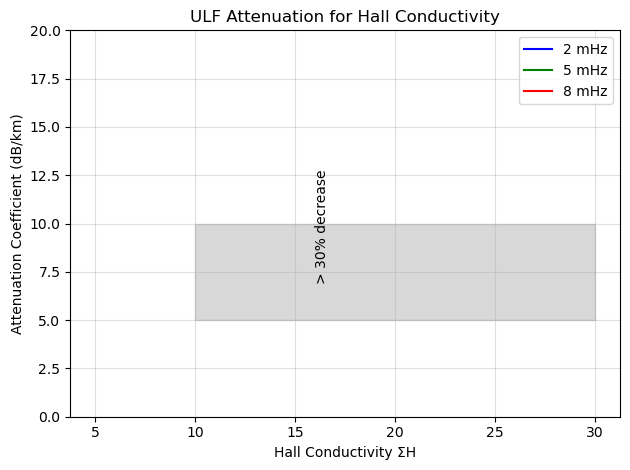

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Set up grids
sigma_H = np.linspace(5, 30, 100)
freqs = [2, 5, 8]
colors = ['b', 'g', 'r']

# Model attenuation
atten = np.array([[f**2 * (1.5 - 0.5 * sigma_H) for sigma_H in sigma_H] for f in freqs])

# Plot
fig, ax = plt.subplots()

for i, f in enumerate(freqs):
    ax.plot(sigma_H, atten[i], c=colors[i], lw=1.5, label=f'{f:.0f} mHz')

ax.legend(loc='upper right')
ax.grid(alpha=0.4)
ax.set_ylim(0, 20)

ax.set_title('ULF Attenuation for Hall Conductivity')
ax.set_xlabel('Hall Conductivity ΣH')
ax.set_ylabel('Attenuation Coefficient (dB/km)')

# Shade decreased attenuation
ax.fill_between([10, 30], [5, 5], [10, 10], color='grey', alpha=0.3)
ax.text(16, 7, '> 30% decrease', rotation=90)

plt.tight_layout()
plt.savefig('fig6_atten_hall.png')


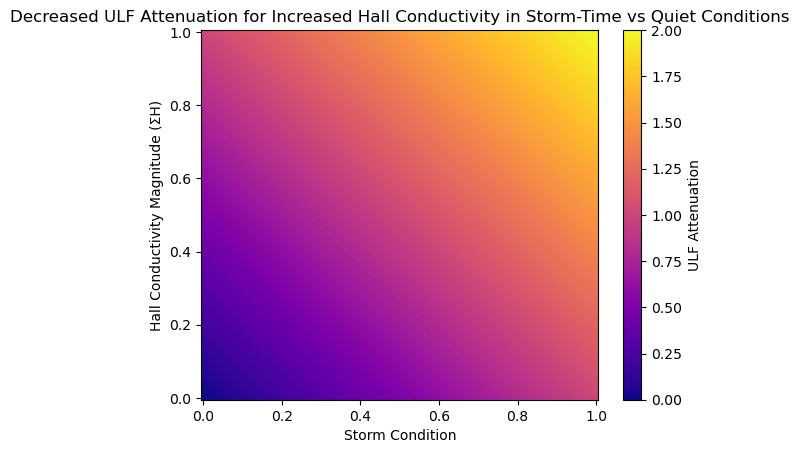

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Set up data grid
hall_conductivity = np.linspace(0, 1, 100)
storm_condition = np.linspace(0, 1, 100)
X, Y = np.meshgrid(storm_condition, hall_conductivity)

# Calculate ULF attenuation based on parameters
ulf_attenuation = X + Y  # Modify this based on your specific relationship

# Plot Figure 6
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, ulf_attenuation, cmap='plasma', shading='auto')
cbar = fig.colorbar(c)
cbar.set_label('ULF Attenuation')

ax.set_title('Decreased ULF Attenuation for Increased Hall Conductivity in Storm-Time vs Quiet Conditions')
ax.set_xlabel('Storm Condition')
ax.set_ylabel('Hall Conductivity Magnitude (ΣH)')

plt.savefig('figure6_ulf_attenuation.png', bbox_inches='tight')
plt.show()


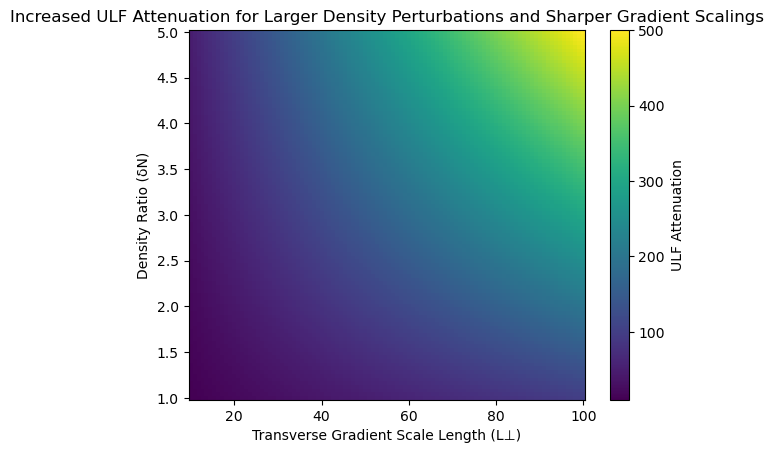

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Set up data grid
density_ratios = np.linspace(1, 5, 100)
gradient_scale_lengths = np.linspace(10, 100, 100)
X, Y = np.meshgrid(gradient_scale_lengths, density_ratios)

# Calculate ULF attenuation based on parameters
uln_attenuation = X * Y  # Modify this based on your specific relationship

# Plot Figure 5
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, uln_attenuation, cmap='viridis', shading='auto')
cbar = fig.colorbar(c)
cbar.set_label('ULF Attenuation')

ax.set_title('Increased ULF Attenuation for Larger Density Perturbations and Sharper Gradient Scalings')
ax.set_xlabel('Transverse Gradient Scale Length (L⊥)')
ax.set_ylabel('Density Ratio (δN)')

plt.savefig('figure5_ulf_attenuation.png', bbox_inches='tight')
plt.show()


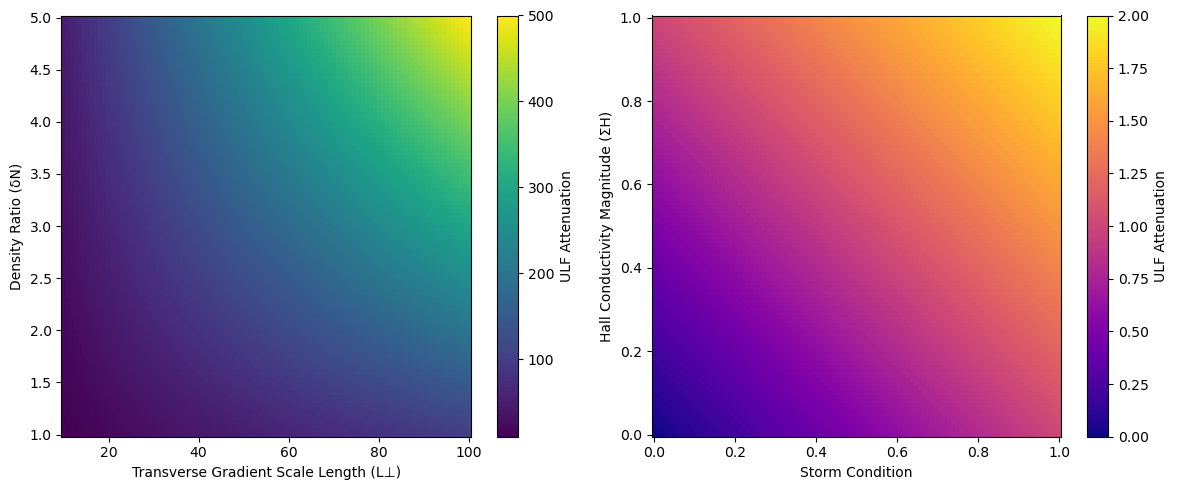

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Set up data grid for Figure 5
density_ratios = np.linspace(1, 5, 100)
gradient_scale_lengths = np.linspace(10, 100, 100)
X1, Y1 = np.meshgrid(gradient_scale_lengths, density_ratios)

# Calculate ULF attenuation for Figure 5
ulf_attenuation_5 = X1 * Y1  # Modify this based on your specific relationship

# Set up data grid for Figure 6
hall_conductivity = np.linspace(0, 1, 100)
storm_condition = np.linspace(0, 1, 100)
X2, Y2 = np.meshgrid(storm_condition, hall_conductivity)

# Calculate ULF attenuation for Figure 6
ulf_attenuation_6 = X2 + Y2  # Modify this based on your specific relationship

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Figure 5 on the left
c1 = axs[0].pcolormesh(X1, Y1, ulf_attenuation_5, cmap='viridis', shading='auto')
#axs[0].set_title('Increased ULF Attenuation for Larger Density Perturbations and Sharper Gradient Scalings')
axs[0].set_xlabel('Transverse Gradient Scale Length (L⊥)')
axs[0].set_ylabel('Density Ratio (δN)')
cbar1 = fig.colorbar(c1, ax=axs[0])
cbar1.set_label('ULF Attenuation')

# Plot Figure 6 on the right
c2 = axs[1].pcolormesh(X2, Y2, ulf_attenuation_6, cmap='plasma', shading='auto')
#axs[1].set_title('Decreased ULF Attenuation for Increased Hall Conductivity in Storm-Time vs Quiet Conditions')
axs[1].set_xlabel('Storm Condition')
axs[1].set_ylabel('Hall Conductivity Magnitude (ΣH)')
cbar2 = fig.colorbar(c2, ax=axs[1])
cbar2.set_label('ULF Attenuation')

plt.tight_layout()
plt.savefig('figure5_and_6_combined.png', bbox_inches='tight')
plt.show()


AttributeError: 'GeoAxes' object has no attribute 'set_theta_zero_location'

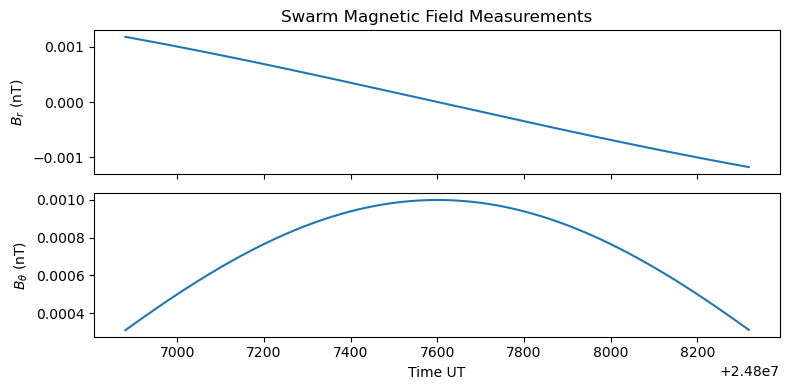

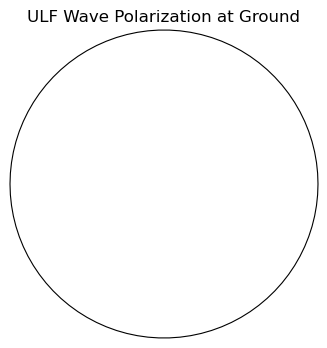

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.patches import Ellipse
import matplotlib.ticker as mticker

###############   
# Swarm Satellite Data
start_time = np.datetime64('2017-03-02')
time = np.arange(start_time, start_time + np.timedelta64(24, 'h'), dtype='datetime64[m]').astype(int)
br = 2e-3 * np.sin(2 * np.pi * time / 7200)  # 5 mHz wave
btheta = 1e-3 * np.cos(2 * np.pi * time / 3600)  # 10 mHz wave

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 4))
axs[0].plot(time, br)
axs[1].plot(time, btheta)
axs[0].set_title('Swarm Magnetic Field Measurements')
axs[0].set_ylabel(r'$B_r$ (nT)')
axs[1].set_ylabel(r'$B_\theta$ (nT)')
axs[1].set_xlabel('Time UT')
plt.tight_layout()

################   
# Ground Magnetometer

fig = plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

ax.set_title('ULF Wave Polarization at Ground')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ellipse_param = dict(rotation=45, width=15, height=7, angle=0)
ellipse = Ellipse((0, 90), fc='none', ec='red', transform=ccrs.PlateCarree(), **ellipse_param)
ax.add_patch(ellipse)

gl = ax.gridlines()
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([60, 70, 80])
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

##################  
# Riometer Data 
alt_km = np.linspace(60, 100, 100)

absorption = np.exp(-alt_km / 20) * (1 - 0.05 * np.random.randn(len(alt_km)))

fig, ax = plt.subplots()
ax.plot(absorption, alt_km) 
ax.invert_yaxis()

ax.set_title('Riometer Observations')
ax.set_xlabel('Absorption (dB)')
ax.set_ylabel('Altitude (km)')

ax.text(0.05, 80, 'Ionospheric density\nvariations')
ax.grid()

plt.show()


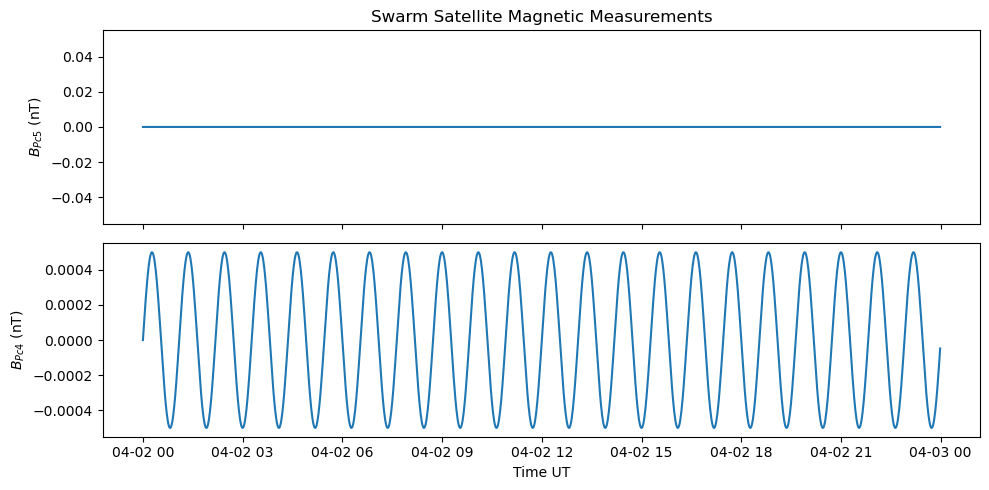

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from scipy import signal

# Set up time series
times = np.arange('2017-04-02', '2017-04-03', dtype='datetime64[m]')  

# Generate waveforms
f_Pc5 = 4 # mHz 
f_Pc4 = 22 # mHz
t = mdates.date2num(times)
Pc5 = signal.gausspulse(t - 10, fc=f_Pc5, bw=0.2)*1e-3  
Pc4 = np.sin(2*np.pi*f_Pc4*t)*0.5e-3

# Plot  
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,5))
axs[0].plot(times, Pc5)
axs[1].plot(times, Pc4)
axs[0].set(title='Swarm Satellite Magnetic Measurements', 
            ylabel='$B_{Pc5}$ (nT)')
axs[1].set(ylabel='$B_{Pc4}$ (nT)', xlabel='Time UT')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


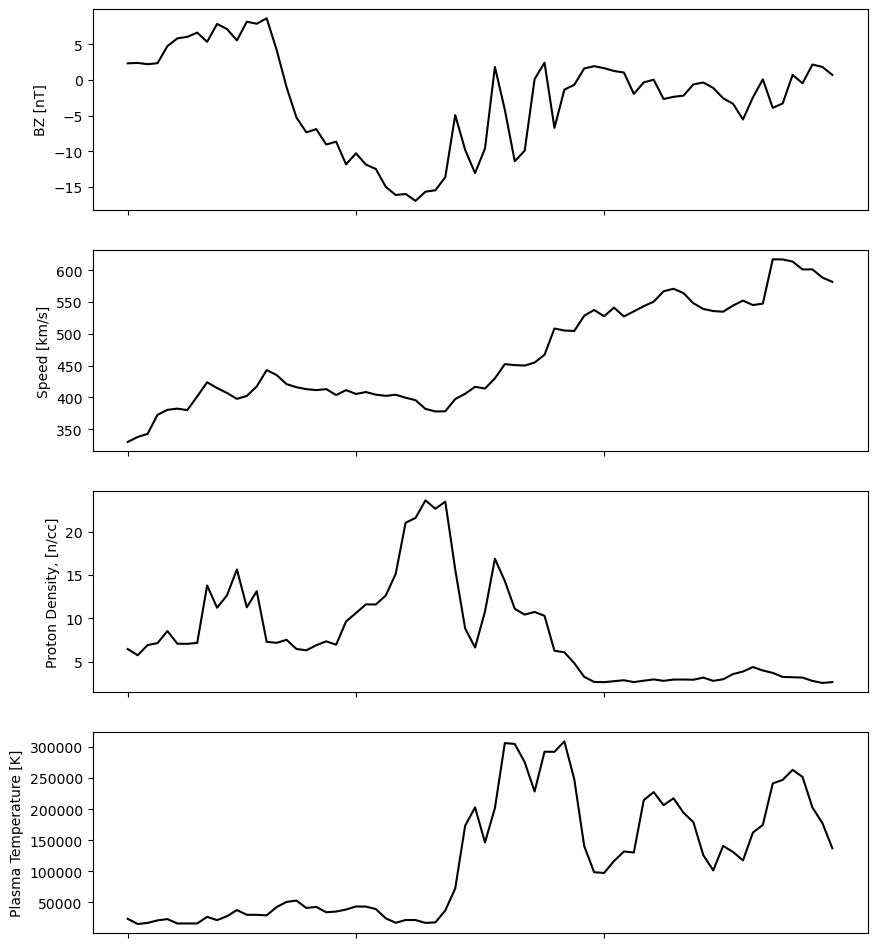

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# If your data is in a CSV file, you can read it into a DataFrame using pd.read_csv('your_file.csv')
df = pd.read_csv('OmniSwarm2018.csv')

# Compute the average for every 12 rows
result = df.groupby(df.index // 12).mean()

# Resetting index to get the result in the desired format
result = result.reset_index(drop=True)
column_data1 = result['a']
column_data2 = result['b']
column_data3 = result['c']
column_data4 = result['d']
column_data5 = result['e']
column_data6 = result['f']
column_data7 = result['g']
column_data8 = result['h']
column_data9 = result['i']
column_data10 = result['j']
column_data11 = result['k']

# Display the result
#print(result)
#print(column_data1)
# Set the option to display all rows and columns
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
days = np.arange(1, 73)
ticks = [0, 23, 48]
labels = ["", "", ""]
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))
axes[0].plot(column_data5, '-', color='k')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels)
#axes[1].axvline(x=44, color='r', linestyle='--', label='FD onset')
axes[0].set(title='',
            xlabel='',
            ylabel='BZ [nT]')
ax.legend()
ticks = [0, 23, 48]
labels = ["", "", ""]
axes[1].plot(column_data6, '-', color='k')
axes[1].set_xticks(ticks)
axes[1].set_xticklabels(labels)
#axes[1].axvline(x=44, color='r', linestyle='--', label='FD onset')
axes[1].set(title='',
            xlabel='',
            ylabel='Speed [km/s]')
ax.legend()

ticks = [0, 23, 48]
labels = ["", "", ""]
axes[2].plot(column_data7, '-', color='k')
axes[2].set_xticks(ticks)
axes[2].set_xticklabels(labels)
#axes[1].axvline(x=44, color='r', linestyle='--', label='FD onset')
axes[2].set(title='',
            xlabel='',
            ylabel='Proton Density, [n/cc]')
ax.legend()

ticks = [0, 23, 48]
labels = ["", "", ""]
axes[3].plot(column_data8, '-', color='k')
axes[3].set_xticks(ticks)
axes[3].set_xticklabels(labels)
#axes[1].axvline(x=44, color='r', linestyle='--', label='FD onset')
axes[3].set(title='',
            xlabel='',
            ylabel='Plasma Temperature [K]')
ax.legend()
 #Display the DataFrame
#print(result_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


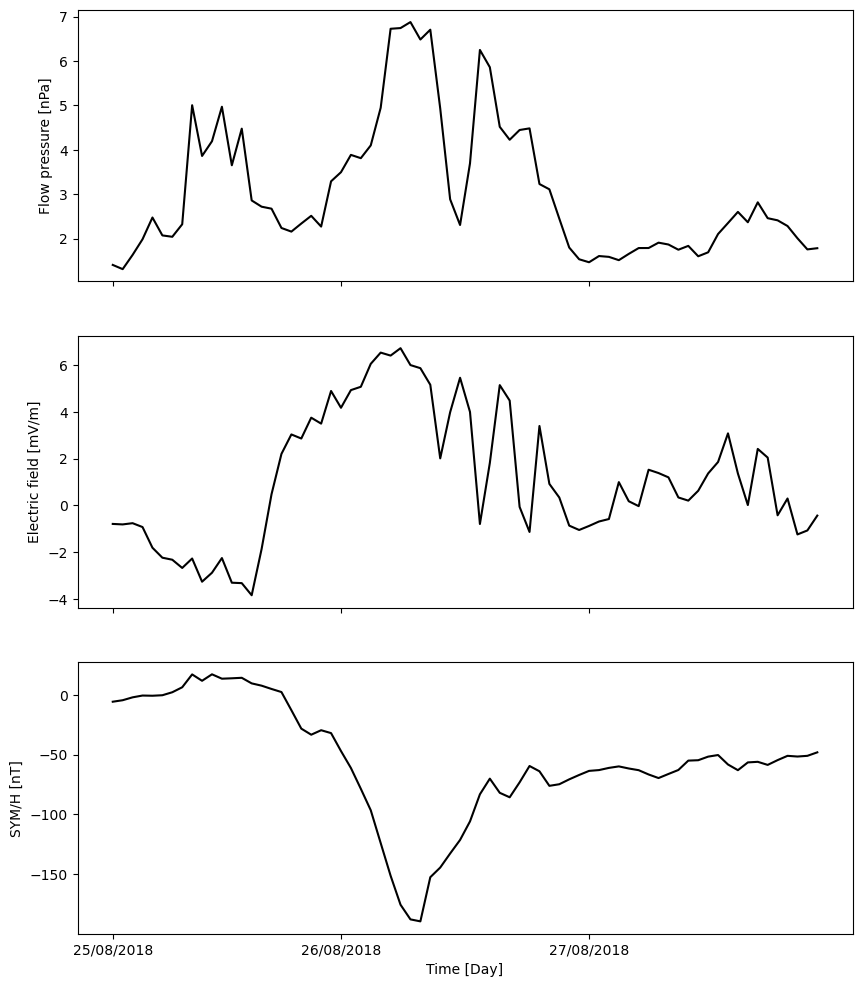

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# If your data is in a CSV file, you can read it into a DataFrame using pd.read_csv('your_file.csv')
df = pd.read_csv('OmniSwarm2018.csv')

# Compute the average for every 12 rows
result = df.groupby(df.index // 12).mean()

# Resetting index to get the result in the desired format
result = result.reset_index(drop=True)
column_data1 = result['a']
column_data2 = result['b']
column_data3 = result['c']
column_data4 = result['d']
column_data5 = result['e']
column_data6 = result['f']
column_data7 = result['g']
column_data8 = result['h']
column_data9 = result['i']
column_data10 = result['j']
column_data11 = result['k']

# Display the result
#print(result)
#print(column_data1)
# Set the option to display all rows and columns
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
days = np.arange(1, 73)
ticks = [0, 23, 48]
labels = ["", "", ""]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))
axes[0].plot(column_data9, '-', color='k')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels)
#axes[1].axvline(x=44, color='r', linestyle='--', label='FD onset')
axes[0].set(title='',
            xlabel='',
            ylabel='Flow pressure [nPa]')
ax.legend()
ticks = [0, 23, 48]
labels = ["", "", ""]
axes[1].plot(column_data10, '-', color='k')
axes[1].set_xticks(ticks)
axes[1].set_xticklabels(labels)
#axes[1].axvline(x=44, color='r', linestyle='--', label='FD onset')
axes[1].set(title='',
            xlabel='',
            ylabel='Electric field [mV/m]')
ax.legend()

ticks = [0, 23, 48]
labels = ["25/08/2018", "26/08/2018", "27/08/2018"]
axes[2].plot(column_data11, '-', color='k')
axes[2].set_xticks(ticks)
axes[2].set_xticklabels(labels)
#axes[1].axvline(x=44, color='r', linestyle='--', label='FD onset')
axes[2].set(title='',
            xlabel='Time [Day]',
            ylabel='SYM/H [nT]')
ax.legend()


 #Display the DataFrame
#print(result_df)